In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions.csv")

In [3]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [5]:
transactions.columns 

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [6]:
transactions_features = transactions.groupby("CustomerID").agg(
    TotalSpend = ("TotalValue", "sum"),
    TransactionFrequency = ("TransactionID", "count"),
    AverageTransactionValue = ("TotalValue", "mean"),
).reset_index()

transactions_features

,CustomerID,TotalSpend,TransactionFrequency,AverageTransactionValue
0,C0001,3354.52,5,670.904000
1,C0002,1862.74,4,465.685000
2,C0003,2725.38,4,681.345000
3,C0004,5354.88,8,669.360000
4,C0005,2034.24,3,678.080000
...,...,...,...,...
194,C0196,4982.88,4,1245.720000
195,C0197,1928.65,3,642.883333
196,C0198,931.83,2,465.915000
197,C0199,1979.28,4,494.820000


In [7]:
customer_features = pd.merge(customers, transactions_features, on="CustomerID", how="inner")
customer_features

,CustomerID,CustomerName,Region,SignupDate,TotalSpend,TransactionFrequency,AverageTransactionValue
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5,670.904000
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4,465.685000
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4,681.345000
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8,669.360000
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3,678.080000
...,...,...,...,...,...,...,...
194,C0196,Laura Watts,Europe,2022-06-07,4982.88,4,1245.720000
195,C0197,Christina Harvey,Europe,2023-03-21,1928.65,3,642.883333
196,C0198,Rebecca Ray,Europe,2022-02-27,931.83,2,465.915000
197,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,4,494.820000


In [8]:
numeric_features = customer_features.select_dtypes(include=[np.number])
numeric_features


,TotalSpend,TransactionFrequency,AverageTransactionValue
0,3354.52,5,670.904000
1,1862.74,4,465.685000
2,2725.38,4,681.345000
3,5354.88,8,669.360000
4,2034.24,3,678.080000
...,...,...,...
194,4982.88,4,1245.720000
195,1928.65,3,642.883333
196,931.83,2,465.915000
197,1979.28,4,494.820000


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [10]:
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(numeric_features)
customer_features_scaled

array([[-6.17014282e-02, -1.14581896e-02, -7.02634115e-02],
       [-8.77743532e-01, -4.67494136e-01, -9.34932971e-01],
       [-4.05857221e-01, -4.67494136e-01, -2.62713110e-02],
       [ 1.03254704e+00,  1.35664965e+00, -7.67688998e-02],
       [-7.83928612e-01, -9.23530083e-01, -4.00280592e-02],
       [ 4.15879421e-01, -4.67494136e-01,  1.55606020e+00],
       [-4.85482293e-01, -9.23530083e-01,  7.26220709e-01],
       [ 4.39970436e-01,  2.26872154e+00, -1.09724996e+00],
       [-1.40630171e+00, -9.23530083e-01, -1.63794564e+00],
       [-9.57166204e-01, -4.67494136e-01, -1.08786883e+00],
       [ 1.43695808e-01, -1.14581896e-02,  2.46146011e-01],
       [ 9.64923716e-01,  9.00613703e-01,  2.51719736e-01],
       [ 1.38575064e+00,  9.00613703e-01,  7.14772302e-01],
       [-1.72239508e+00, -1.83560198e+00, -1.55440798e+00],
       [-1.26353893e+00, -1.37956603e+00, -4.58587130e-01],
       [ 2.22697270e-01, -1.14581896e-02,  3.67845832e-01],
       [ 7.03751732e-01,  1.35664965e+00

In [11]:
cluster_range = range(2, 11)
db_index_scores = []
silhouette_scores = []
inertia_values = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_features_scaled)
    
    # Evaluation metrics
    db_index_scores.append(davies_bouldin_score(customer_features_scaled, labels))
    silhouette_scores.append(silhouette_score(customer_features_scaled, labels))
    inertia_values.append(kmeans.inertia_)

Text(0, 0.5, 'Davies-Bouldin Index')

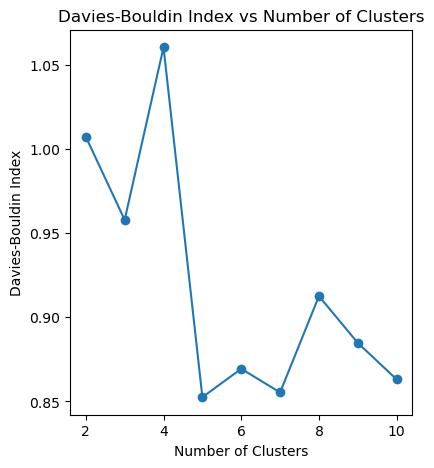

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(cluster_range, db_index_scores, marker='o')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")

Text(0, 0.5, 'Silhouette Score')

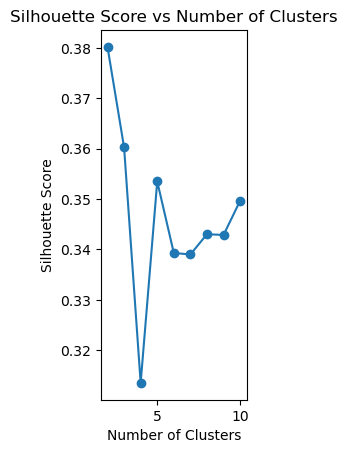

In [13]:
plt.subplot(1, 3, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

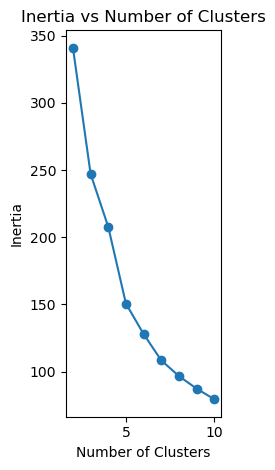

In [14]:
plt.subplot(1, 3, 3)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Inertia vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.tight_layout()
plt.show()

In [15]:
optimal_clusters = 4 

In [16]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features_scaled_kmeans = kmeans.fit_predict(customer_features_scaled)


In [17]:
customer_features

,CustomerID,CustomerName,Region,SignupDate,TotalSpend,TransactionFrequency,AverageTransactionValue
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5,670.904000
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4,465.685000
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4,681.345000
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8,669.360000
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3,678.080000
...,...,...,...,...,...,...,...
194,C0196,Laura Watts,Europe,2022-06-07,4982.88,4,1245.720000
195,C0197,Christina Harvey,Europe,2023-03-21,1928.65,3,642.883333
196,C0198,Rebecca Ray,Europe,2022-02-27,931.83,2,465.915000
197,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,4,494.820000


In [18]:
pca = PCA(n_components=2)
customer_features_pca = pca.fit_transform(customer_features_scaled)


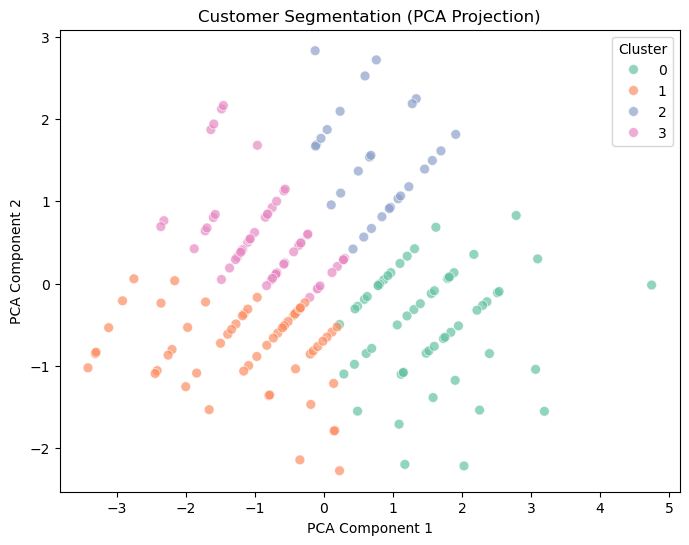

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_features_pca[:, 0], y=customer_features_pca[:, 1],
    hue=customer_features_scaled_kmeans, palette="Set2",
    s=50, alpha=0.7
)
plt.title("Customer Segmentation (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


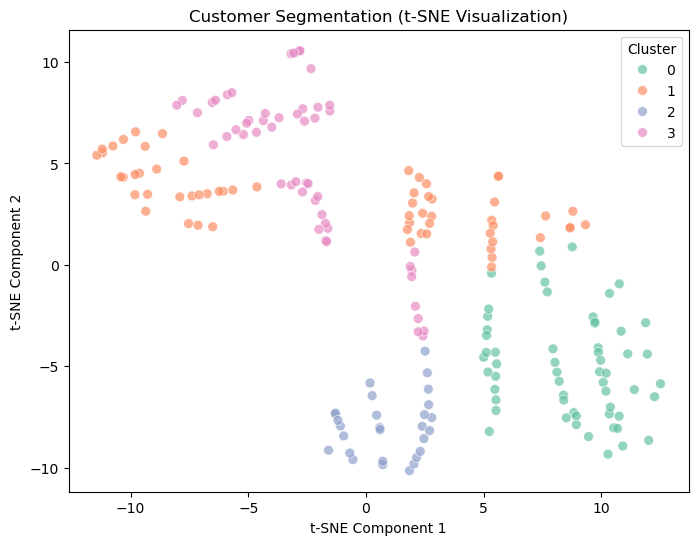

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
customer_features_tsne = tsne.fit_transform(customer_features_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_features_tsne[:, 0], y=customer_features_tsne[:, 1],
    hue=customer_features_scaled_kmeans, palette="Set2",
    s=50, alpha=0.7
)
plt.title("Customer Segmentation (t-SNE Visualization)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()

In [21]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features_scaled)

if 'Cluster' not in customer_features.columns:
    print("Error: 'Cluster' column is missing in the DataFrame.")


In [22]:
customer_features.to_csv("Customer_Segmentation_Results.csv", index=False)

In [23]:
db_index = davies_bouldin_score(customer_features_scaled, customer_features['Cluster'])
silhouette = silhouette_score(customer_features_scaled, customer_features['Cluster'])

In [24]:
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette}')

Davies-Bouldin Index: 1.0604240399923035
Silhouette Score: 0.3135106549790539


In [25]:
customer_features['Cluster'].value_counts()

Cluster
1    60
0    58
3    53
2    28
Name: count, dtype: int64

In [26]:
customer_features.head()

,CustomerID,CustomerName,Region,SignupDate,TotalSpend,TransactionFrequency,AverageTransactionValue,Cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5,670.904,3
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4,465.685,1
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4,681.345,3
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8,669.360,0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3,678.080,3


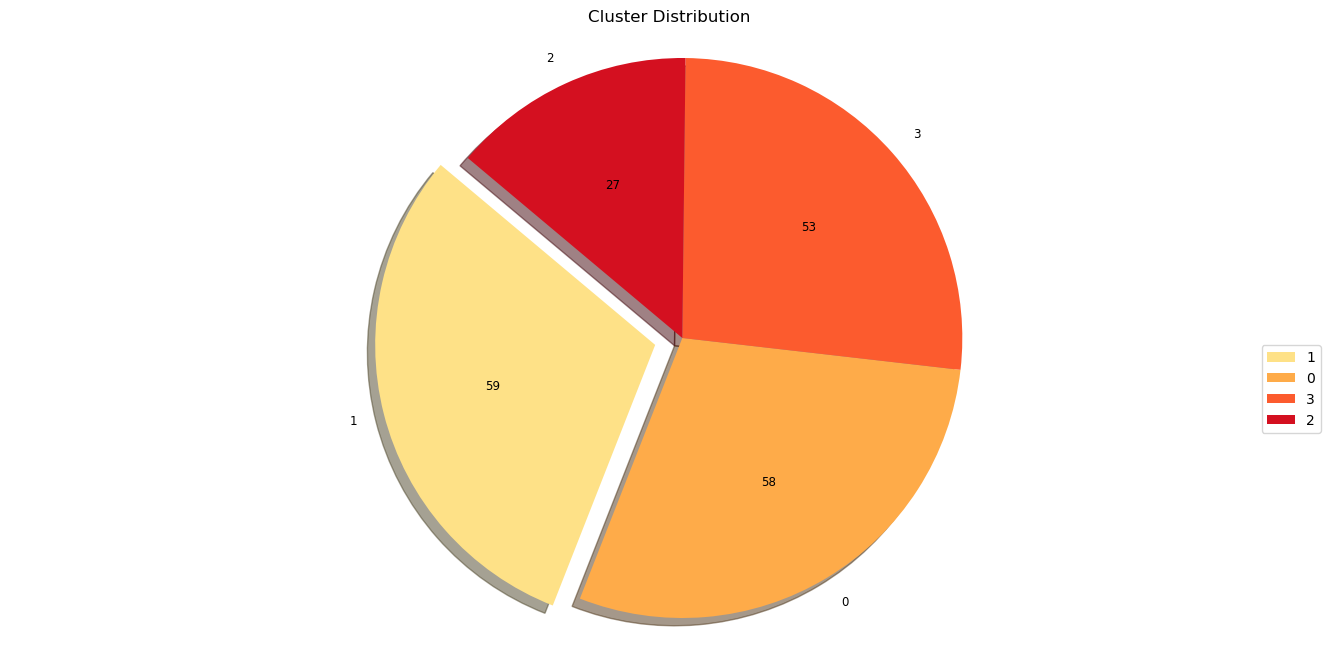

In [27]:
cluster_counts = customer_features["Cluster"].value_counts()

colors = sns.color_palette("YlOrRd", len(cluster_counts))

explode = [0.1 if i == max(cluster_counts) else 0 for i in cluster_counts]

plt.figure(figsize=(17, 8))
patches, texts, autotexts = plt.pie(
    cluster_counts, 
    labels=cluster_counts.index, 
    autopct=lambda p: f'{int(p * sum(cluster_counts) / 100)}', 
    colors=colors, 
    explode=explode, 
    shadow=True, 
    startangle=140, 
    labeldistance=1.1
)
for text in texts + autotexts:
    text.set_fontsize(8.5)

plt.legend(patches, cluster_counts.index, loc='best', bbox_to_anchor=(1, 0.5))

plt.title('Cluster Distribution', loc="center")

plt.axis('equal')

plt.show()


In [28]:
customer_features.Cluster.value_counts()

Cluster
1    60
0    58
3    53
2    28
Name: count, dtype: int64